In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples = 1000,
    n_features = 10, 
    n_informative = 5,
    n_redundant = 2,
    n_classes = 3,
    weights = [0.4, 0.35, 0.25],
    random_state = 42,
)

cols = [f'Hususiyat_{i+1}' for i in range(len(X[0]))]
df = pd.DataFrame(X, columns = cols)
df['target'] = y
df.head()

,Hususiyat_1,Hususiyat_2,Hususiyat_3,Hususiyat_4,Hususiyat_5,Hususiyat_6,Hususiyat_7,Hususiyat_8,Hususiyat_9,Hususiyat_10,target
0,-2.568916,-0.257409,-2.679357,3.864818,2.564998,-0.737556,-3.330985,-1.213370,-1.473105,-0.846386,1
1,0.622861,0.534544,0.018283,-0.283382,1.907637,-0.341310,1.206240,-1.093532,-0.469791,-0.188022,1
2,-0.171251,-0.496278,1.613347,2.488069,-1.677966,0.303604,-2.104579,0.714531,3.475999,0.623386,0
3,0.519354,-0.333946,-0.547530,-1.391319,-0.011294,0.212820,1.296832,0.716046,0.890619,-1.844461,0
4,2.346402,-0.699965,-0.203251,-0.256745,-1.974251,0.619663,-1.247950,-1.662115,3.921452,-0.759491,0


In [4]:
df.target.value_counts()

target
0    396
1    352
2    252
Name: count, dtype: int64

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape, sep='\n')

(800, 10)
(200, 10)
(800,)
(200,)


In [10]:
models = {
    'Logistic_Regression' : LogisticRegression(max_iter=200),
    'SVM_linear' : SVC(kernel = 'linear'),
    'SVM_rbf' : SVC(kernel = 'rbf'),
    'KNN' : KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes' : GaussianNB(),
    'Random Forest' : RandomForestClassifier(n_estimators=100),
    'Tree model' : DecisionTreeClassifier(),
}

results = []
for model_name, model in models.items():
    pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
        ('classifier', model),
    ])

    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring = 'accuracy')
    mean_score = cv_scores.mean()


    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)

    results.append(
        {
            'Model' : model_name,
            'CV Accuracy' : mean_score,
            'Test Accuracy' : test_accuracy,
        }
    )

    print(f'Classification report for {model_name}:', classification_report(y_test, y_pred), sep = '\n', end = '\n\n')

Classification report for Logistic_Regression:
              precision    recall  f1-score   support

           0       0.69      0.79      0.74        68
           1       0.69      0.74      0.72        73
           2       0.61      0.46      0.52        59

    accuracy                           0.68       200
   macro avg       0.67      0.66      0.66       200
weighted avg       0.67      0.68      0.67       200


Classification report for SVM_linear:
              precision    recall  f1-score   support

           0       0.71      0.81      0.76        68
           1       0.73      0.81      0.77        73
           2       0.69      0.49      0.57        59

    accuracy                           0.71       200
   macro avg       0.71      0.70      0.70       200
weighted avg       0.71      0.71      0.71       200


Classification report for SVM_rbf:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89        68
       

In [13]:
result_df = pd.DataFrame(results)
result_df = result_df.sort_values(by='Test Accuracy', ascending=False)

Accuracy score : 0.86

Classification report:
               precision    recall  f1-score   support

           0       0.84      0.94      0.89        68
           1       0.89      0.85      0.87        73
           2       0.85      0.78      0.81        59

    accuracy                           0.86       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.86      0.86      0.86       200




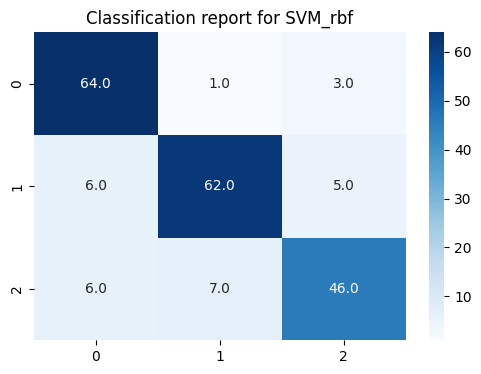

In [19]:
best_model_name = result_df.iloc[0]['Model']
best_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
    ('classifier', models[best_model_name]),
])

best_pipeline.fit(X_train, y_train)
y_pred = best_pipeline.predict(X_test)

print(f'Accuracy score : {accuracy_score(y_test, y_pred)}', f'Classification report:\n {classification_report(y_test, y_pred)}', sep='\n\n', end='\n\n')

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = '.1f', cmap='Blues')
plt.title(f'Classification report for {best_model_name}')
plt.show()